In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests

# plt.style.available
plt.style.use("seaborn-v0_8-deep")

In [3]:
wiki_url = "http://pl.wikipedia.org/wiki/Katastrofy_i_incydenty_cywilnych_samolot%C3%B3w_pasa%C5%BCerskich#2023"

In [4]:
tables = pd.read_html(wiki_url)

In [5]:
raw_html = requests.get(wiki_url).text
pattern = '<a class="vector-toc-link" href="#(\d+)"'
toc = list(map(int, re.findall(pattern, raw_html)))


len(toc), len(tables)

(97, 98)

In [6]:
crashes = tables[1:]

for crash, year in zip(crashes, toc):
    crash["Rok"] = year

crashes_df = pd.concat(crashes, axis='rows')
crashes_df.drop('Unnamed: 9', axis=1, inplace=True)
crashes_df.drop('Zobacz więcej', axis=1, inplace=True)
crashes_df.drop('Numer lotu', axis=1, inplace=True)
crashes_df.drop('L.P', axis=1, inplace=True)
crashes_df.drop("Nr rej.", axis=1, inplace=True)
crashes_df.drop("Data", axis=1, inplace=True)
crashes_df.columns
crashes_df.reset_index(inplace=True)
crashes_df.drop(columns=["index"], inplace=True)

In [7]:
crashes_df.head()

,Miejsce zdarzenia,Linia lotnicza,Samolot,Ofiary,Ocaleni,Rok
0,Włochy,Caproni,Caproni Ca.48,"14, 15 lub 17",0,1919
1,Francja,Daimler Airway,de Havilland DH-18A,2,0,1922
2,Francja,CGEA,Farman F-68 Goliath,5,0,1922
3,Stany Zjednoczone,Aeromarine East Indies Airways,Aeromarine 75,4,5,1923
4,Francja,Air Union,Farman F-60 Goliath,2,4,1923


# Data cleaning
## Victims

In [8]:
# Non numeric values to preprocess
def find_non_numerical_unique_values(ds: pd.Series) -> np.array:
    return ds[~ds.astype(str).str.isnumeric()].unique()
    
find_non_numerical_unique_values(crashes_df["Ofiary"])

array(['14, 15 lub 17', '?', '237[a]', nan, '92*', '65*', '64*', '44*',
       0.0, 90.0, 7.0, 103.0, 8.0, 44.0, 158.0, 152.0, 2.0, 12.0, 42.0,
       14.0, 20.0, 17.0, 68.0, 21.0, 22.0, '239[b]', '39[c]',
       '2 (na ziemi)'], dtype=object)

In [9]:
def extract_first_numbers(ds: pd.Series) -> np.array:
    return ds.astype(str).apply(lambda x: re.match(r'^(\d*)', x).group(1))

find_non_numerical_unique_values(
    extract_first_numbers(crashes_df["Ofiary"])
)

array([''], dtype=object)

In [10]:
crashes_df["Ofiary"] = extract_first_numbers(crashes_df["Ofiary"])
crashes_df[crashes_df["Ofiary"]=='']

,Miejsce zdarzenia,Linia lotnicza,Samolot,Ofiary,Ocaleni,Rok
8,Stany Zjednoczone,TWA,Ford-4-AT-E-Trimotor,,?,1931
9,Stany Zjednoczone,TWA,Ford-5-AT-B-Trimotor,,?,1932
11,Stany Zjednoczone,TWA,Ford Trimotor,,?,1933
14,Stany Zjednoczone,TWA,Douglas DC-2,,?,1935
33,Stany Zjednoczone,TWA,Douglas DC-3,,?,1941
45,Stany Zjednoczone,TWA,Douglas DC-3,,?,1944
46,Stany Zjednoczone,TWA,Douglas DC-3,,?,1944
48,Stany Zjednoczone,TWA,Douglas DC-3,,?,1945
51,Stany Zjednoczone,TWA,Douglas DC-3,,?,1946
54,Stany Zjednoczone,TWA,Lockheed Constellation,,?,1946


## Survivors

In [11]:
find_non_numerical_unique_values(crashes_df["Ocaleni"])

array(['?', '0.', 2.0, 0.0, nan, 53.0, 272.0, 135.0, 158.0, 19.0, 50.0,
       1.0], dtype=object)

In [12]:
crashes_df["Ocaleni"] = extract_first_numbers(crashes_df["Ocaleni"])
crashes_df[crashes_df["Ocaleni"]=='']

,Miejsce zdarzenia,Linia lotnicza,Samolot,Ofiary,Ocaleni,Rok
8,Stany Zjednoczone,TWA,Ford-4-AT-E-Trimotor,,,1931
9,Stany Zjednoczone,TWA,Ford-5-AT-B-Trimotor,,,1932
11,Stany Zjednoczone,TWA,Ford Trimotor,,,1933
14,Stany Zjednoczone,TWA,Douglas DC-2,,,1935
33,Stany Zjednoczone,TWA,Douglas DC-3,,,1941
45,Stany Zjednoczone,TWA,Douglas DC-3,,,1944
46,Stany Zjednoczone,TWA,Douglas DC-3,,,1944
48,Stany Zjednoczone,TWA,Douglas DC-3,,,1945
51,Stany Zjednoczone,TWA,Douglas DC-3,,,1946
54,Stany Zjednoczone,TWA,Lockheed Constellation,,,1946


In [13]:
incomplete_death_ratio_data_mask = (
    (crashes_df["Ocaleni"]=='')
    | (crashes_df["Ofiary"]=='')
)

print(
    "Number of rows with incomplete survivors or victims data:", 
    incomplete_death_ratio_data_mask.sum()
)

# crashes_df[incomplete_death_ratio_data_mask]

Number of rows with incomplete survivors or victims data: 29


In [14]:
crashes_without_death_ratio_df = crashes_df[incomplete_death_ratio_data_mask]
crashes_df = crashes_df[~incomplete_death_ratio_data_mask]

## place of the crash

In [15]:
crashes_df["Miejsce zdarzenia"].unique()

array(['Włochy', 'Francja', 'Stany Zjednoczone', 'Australia', 'Belgia',
       'III Rzesza', 'Wielka Brytania', 'Polska', 'Bułgaria',
       'Samoa Amerykańskie', 'Rumunia', 'Finlandia',
       'Holenderskie Indie Wschodnie', 'Holandia', 'Argentyna',
       'Norwegia', 'Bermudy', 'Niemcy', 'Chiny', 'Kanada', 'Portugalia',
       'Egipt', 'Liberia', 'Portoryko', 'Brazylia', 'Indie', 'Irlandia',
       'Indonezja', 'ZSRR', 'Ocean Spokojny', 'Libia', 'Liban', 'Turcja',
       'Jamajka', 'Etiopia', 'RFN', 'Maroko', 'Kamerun', 'Gwadelupa',
       'Tajlandia', 'Nepal', 'Nowa Zelandia', 'Szwajcaria', 'Austria',
       'Tajwan', 'Szwecja', 'Chile', 'Hiszpania', 'Montserrat',
       'Kolumbia', 'Japonia', 'Czechosłowacja', 'Południowa Afryka',
       'Cypr', 'Grecja', 'Łotwa', 'Namibia', 'Wenezuela', 'Meksyk',
       'Filipiny', 'Korea Południowa', 'Samoa', 'Dominikana', 'Peru',
       'Bahrajn', 'Jugosławia', 'Jemen', 'Zjednoczone Emiraty Arabskie',
       'Wietnam', 'NRD', 'Pakistan', 'Poline

In [16]:
crashes_df[crashes_df["Miejsce zdarzenia"].isna()]

,Miejsce zdarzenia,Linia lotnicza,Samolot,Ofiary,Ocaleni,Rok


In [17]:
crashes_df = crashes_df[~crashes_df["Miejsce zdarzenia"].isna()]
len(crashes_df)

1297

## airline

In [18]:
# about three cells contains two airlines separated by slash, as one string, 
# probably i will do nothing about this because for now I dont care about airlines
# sorted(crashes_df["Linia lotnicza"].unique())

In [19]:
# crashes_df["Linia lotnicza"].unique()

In [20]:
def find_non_alpha_unique_values(ds: pd.Series) -> np.array:
    return ds[ds.str.contains(r"[^\w\s]")].unique()

find_non_alpha_unique_values(crashes_df["Linia lotnicza"])

array(['?', 'Trans-Canada Airlines', 'Trans-Canada Air Lines',
       'Dan-Air London', 'Dan-Air', 'Trans-Colorado Airlines',
       'Tan – SAHSA', "L'Express Airlines", 'Bristow Helicopters Ltd.',
       'Hapag-Lloyd Airlines', 'Shangri-La Air', 'Volga-AviaExpress',
       "Chalk's Ocean Airways", 'AerianTur-M', 'One-Two-GO Airlines',
       'Aviastar-TU', 'Petropavlovsk-Kamchatsky Air',
       'Alitalia/Carpatair', 'Sepahan Air/Taban Air',
       'US-Bangla Airlines', 'Cubana de Aviación/Global Air',
       'Atlas Air/Amazon Prime Air', 'Volga-Dnepr Airlines',
       'Petropavlovsk-Kamchatsky Air Enterprise'], dtype=object)

In [21]:
crashes_df[crashes_df["Linia lotnicza"]=='?']
# https://en.wikipedia.org/wiki/R101
# " killing 48 of the 54 people on board" <- perhaps there are errors in data

,Miejsce zdarzenia,Linia lotnicza,Samolot,Ofiary,Ocaleni,Rok
5,Francja,?,?,48,0,1930


## Fix types

In [22]:
crashes_df[["Ofiary", "Ocaleni"]] = crashes_df[["Ofiary", "Ocaleni"]].astype(int)
crashes_df.dtypes

Miejsce zdarzenia    object
Linia lotnicza       object
Samolot              object
Ofiary                int64
Ocaleni               int64
Rok                   int64
dtype: object

# Data Analyze

In [23]:
crashes_df.describe()

,Ofiary,Ocaleni,Rok
count,1297.000000,1297.000000,1297.000000
mean,42.745567,40.915189,1987.962992
std,56.464946,78.436982,21.461892
min,0.000000,0.000000,1919.000000
25%,2.000000,0.000000,1972.000000
50%,21.000000,1.000000,1990.000000
75%,62.000000,43.000000,2007.000000
max,520.000000,521.000000,2023.000000


- [Article](https://en.wikipedia.org/wiki/Air_France_Flight_066) about Plane crash with biggest number of survivors 
- [English](https://en.wikipedia.org/wiki/Japan_Air_Lines_Flight_123) and [Polish](https://pl.wikipedia.org/wiki/Katastrofa_lotu_Japan_Airlines_123) articles about most deadliest plane crash.

In [24]:
all_victims, all_survivors = crashes_df[["Ofiary", "Ocaleni"]].sum()
print(f"Death ratio {all_victims/(all_victims+all_survivors)}")

Death ratio 0.5109392855826298


Global death ratio for plane crashes are surprisingly close to 0.5. 
I though that usually on one survive plane crash. 
My wrong opinion is caused by fact that I didn't realize, this dataset contains 
not only examples when planes actually hit the ground during crash, but also
all malfunctions that caused emergency landings.

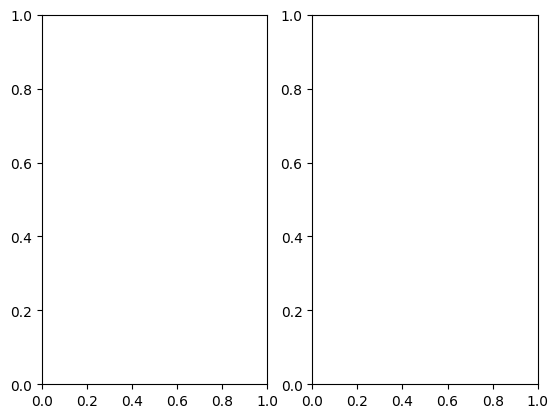

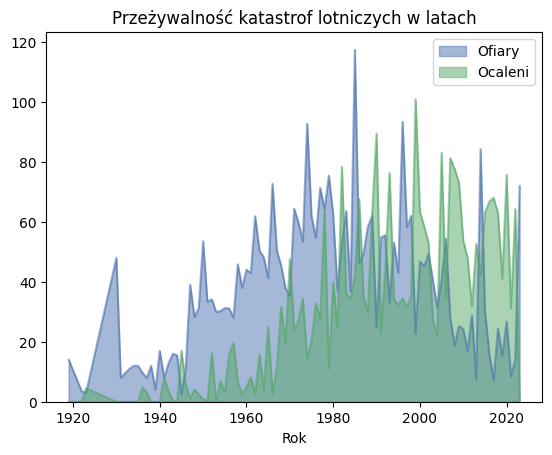

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.sca(ax1)
(
    crashes_df[["Ofiary", "Ocaleni", "Rok"]]
    .groupby("Rok")
    .agg(np.mean)
    .plot(kind="area", alpha=0.5, stacked=False)
)
plt.title("Przeżywalność katastrof lotniczych w latach")

plt.sca(ax2)

Ilość katastrof    8.10625
dtype: float64

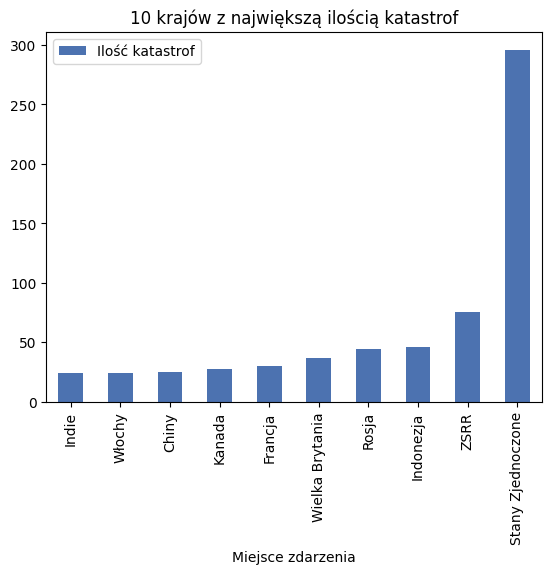

In [26]:
crashes_by_country = (
    crashes_df[["Rok", "Miejsce zdarzenia"]]
    .groupby("Miejsce zdarzenia")
    .agg("count")
    .rename({"Rok": "Ilość katastrof"}, axis=1)
    .sort_values("Ilość katastrof")
)
(
    crashes_by_country
    .iloc[-10:]
    .plot.bar()
)
plt.title("10 krajów z największą ilością katastrof")
crashes_by_country.mean()

In [27]:

polish_crashes = crashes_df[crashes_df["Miejsce zdarzenia"]=="Polska"]
print("death rate", np.mean(polish_crashes["Ofiary"]/(polish_crashes["Ofiary"] + polish_crashes["Ocaleni"])))
polish_crashes.describe()


death rate 0.46727635759465996


,Ofiary,Ocaleni,Rok
count,13.000000,13.000000,13.000000
mean,30.307692,32.769231,1972.923077
std,52.789495,63.136299,21.986593
min,0.000000,0.000000,1936.000000
25%,1.000000,0.000000,1962.000000
50%,4.000000,10.000000,1980.000000
75%,33.000000,28.000000,1987.000000
max,183.000000,231.000000,2011.000000


[Biggest Polish crash](https://pl.wikipedia.org/wiki/Katastrofa_lotnicza_w_Lesie_Kabackim) 

Text(0.5, 1.0, 'Ilość wypadków lotniczych w latach')

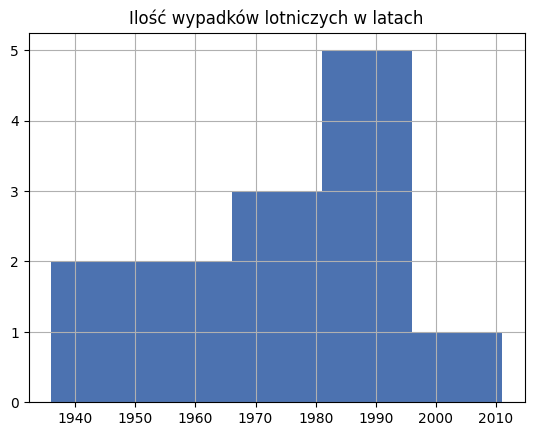

In [86]:
polish_crashes["Rok"].hist(bins=5)
plt.title("Ilość wypadków lotniczych w latach")
    